In [2]:
import specular
import numpy as np

## 2. Numerical ordinary differential equations

### 2.1 Classical schemes

In [4]:
def F(t, u):
   return -3*u 

specular.ode.classical_scheme(F=F, u_0=1.0, t_0=0.0, T=2.0, h=0.1, scheme="explicit Euler")

Running the explicit Euler scheme: 100%|██████████| 20/20 [00:00<?, ?it/s]


In [6]:
def F(t, u):
   return -3*u 

specular.ode.classical_scheme(F=F, u_0=1.0, t_0=0.0, T=2.0, h=0.1, scheme="explicit Euler").values()

Running the explicit Euler scheme: 100%|██████████| 20/20 [00:00<?, ?it/s]


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 array([1.00000000e+00, 7.00000000e-01, 4.90000000e-01, 3.43000000e-01,
        2.40100000e-01, 1.68070000e-01, 1.17649000e-01, 8.23543000e-02,
        5.76480100e-02, 4.03536070e-02, 2.82475249e-02, 1.97732674e-02,
        1.38412872e-02, 9.68890104e-03, 6.78223073e-03, 4.74756151e-03,
        3.32329306e-03, 2.32630514e-03, 1.62841360e-03, 1.13988952e-03,
        7.97922663e-04]))

Running the explicit Euler scheme: 100%|██████████| 200/200 [00:00<?, ?it/s]


Figure saved to figures\explicit-Euler


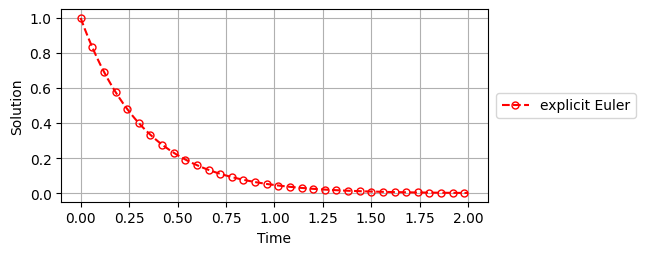

In [17]:
def F(t, u):
    return -3*u 

specular.ode.classical_scheme(F=F, u_0=1.0, t_0=0.0, T=2.0, h=0.01, scheme="explicit Euler").visualization(save_path="explicit-Euler")

In [18]:
t_0 = 0.0
T = 2.5
h = 0.1

def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

def u_0(t_0):
    return exact_sol(t_0)

specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="explicit Euler").table(exact_sol=exact_sol)

Running the explicit Euler scheme: 100%|██████████| 25/25 [00:00<?, ?it/s]


,Numerical solution,Exact solution,Error
Time,,,
0.0,1.000000,1.000000,0.000000
0.1,0.700000,0.740818,0.040818
0.2,0.490000,0.548812,0.058812
0.3,0.343000,0.406570,0.063570
0.4,0.240100,0.301194,0.061094
0.5,0.168070,0.223130,0.055060
0.6,0.117649,0.165299,0.047650
0.7,0.082354,0.122456,0.040102
0.8,0.057648,0.090718,0.033070


In [22]:
def F(t, u):
    return -(t*u)/(1-t**2)
 
def exact_sol(t):
    return np.sqrt(1 - t**2)
     
def u_0(t_0):
    return exact_sol(t_0)

specular.ode.solver.classical_scheme(F, t_0=0.0, u_0=u_0, T=0.9, h=0.01, scheme="implicit Euler").table(exact_sol=exact_sol, save_path="implicit-Euler")

Running the implicit Euler scheme: 100%|██████████| 90/90 [00:00<00:00, 89942.19it/s]

Table saved to tables\implicit-Euler.csv


,Numerical solution,Exact solution,Error
Time,,,
0.00,1.000000,1.000000,0.000000
0.01,0.999900,0.999950,0.000050
0.02,0.999700,0.999800,0.000100
0.03,0.999400,0.999550,0.000150
0.04,0.999000,0.999200,0.000200
...,...,...,...
0.86,0.504465,0.510294,0.005829
0.87,0.487036,0.493052,0.006016
0.88,0.468751,0.474974,0.006223


Running Crank-Nicolson scheme: 100%|██████████| 25/25 [00:00<?, ?it/s]


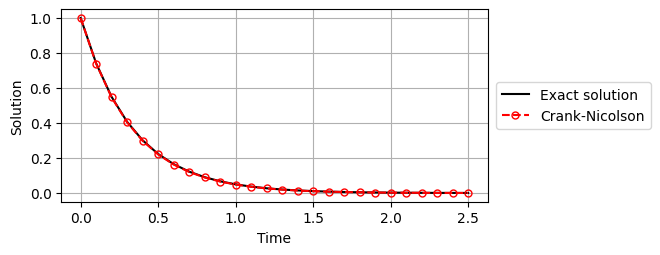

,Numerical solution,Exact solution,Error
Time,,,
0.0,1.000000,1.000000,0.000000
0.1,0.739131,0.740818,0.001688
0.2,0.546314,0.548812,0.002498
0.3,0.403797,0.406570,0.002772
0.4,0.298459,0.301194,0.002735
0.5,0.220600,0.223130,0.002530
0.6,0.163052,0.165299,0.002247
0.7,0.120517,0.122456,0.001940
0.8,0.089078,0.090718,0.001640


In [10]:
specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="Crank-Nicolson").visualization(exact_sol=exact_sol).table(exact_sol=exact_sol)

### 2.2 Specular trigonometric scheme

Running specular trigonometric scheme: 100%|██████████| 24/24 [00:00<?, ?it/s]


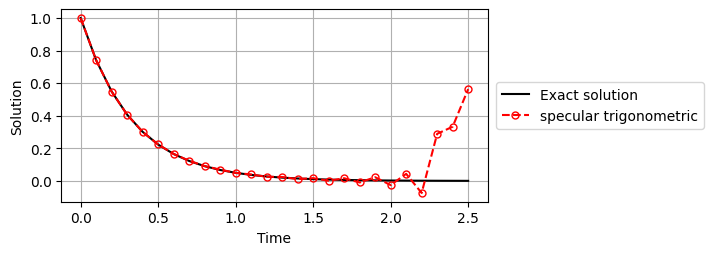

,Numerical solution,Exact solution,Error
Time,,,
0.0,1.000000,1.000000,0.000000
0.1,0.740818,0.740818,0.000000
0.2,0.547510,0.548812,0.001302
0.3,0.406351,0.406570,0.000218
0.4,0.300641,0.301194,0.000553
0.5,0.223892,0.223130,0.000761
0.6,0.165526,0.165299,0.000227
0.7,0.124011,0.122456,0.001555
0.8,0.091001,0.090718,0.000283


In [7]:
u_1 = exact_sol(t_0 + h)

specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=u_1, T=T, h=h).visualization(exact_sol=exact_sol).table(exact_sol=exact_sol)

### 2.3 Specular Euler scheme

Running the implicit Euler scheme: 100%|██████████| 90/90 [00:00<00:00, 90027.99it/s]


Figure saved to figures\implicit-Euler


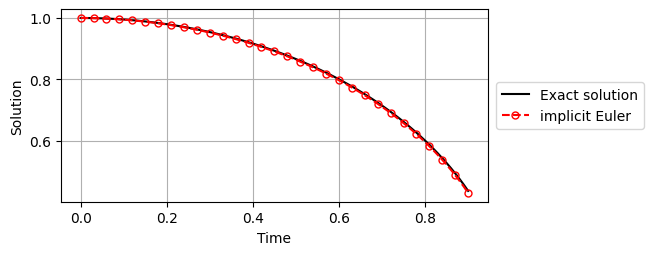

Table saved to tables\implicit-Euler.csv


,Numerical solution,Exact solution,Error
Time,,,
0.00,1.000000,1.000000,0.000000
0.01,0.999900,0.999950,0.000050
0.02,0.999700,0.999800,0.000100
0.03,0.999400,0.999550,0.000150
0.04,0.999000,0.999200,0.000200
...,...,...,...
0.86,0.504465,0.510294,0.005829
0.87,0.487036,0.493052,0.006016
0.88,0.468751,0.474974,0.006223


In [13]:
def F(t, u):
    return -(t*u)/(1-t**2)

def exact_sol(t):
    return np.sqrt(1 - t**2)
    
def u_0(t_0):
    return exact_sol(t_0)

specular.ode.solver.classical_scheme(F=F, u_0=u_0, t_0=0.0, T=0.9, h=0.01, scheme="implicit Euler").visualization(exact_sol=exact_sol, save_path="implicit Euler").table(exact_sol=exact_sol, save_path="implicit Euler")

### 2.2 Specular trigonometric scheme

### 2.3 Specular Euler scheme